In [414]:
# Tambahkan Library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [375]:
# Membaca File CSV
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [376]:
# Mengecek Info DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [377]:
df.drop(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'CarName'], axis=1, inplace=True)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   cylindernumber    205 non-null    object 
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 24.1+ KB


In [379]:
df.duplicated().sum()

3

In [380]:
df.drop_duplicates(inplace=True)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         202 non-null    float64
 1   carlength         202 non-null    float64
 2   carwidth          202 non-null    float64
 3   carheight         202 non-null    float64
 4   curbweight        202 non-null    int64  
 5   cylindernumber    202 non-null    object 
 6   enginesize        202 non-null    int64  
 7   boreratio         202 non-null    float64
 8   stroke            202 non-null    float64
 9   compressionratio  202 non-null    float64
 10  horsepower        202 non-null    int64  
 11  peakrpm           202 non-null    int64  
 12  citympg           202 non-null    int64  
 13  highwaympg        202 non-null    int64  
 14  price             202 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 25.2+ KB


In [ ]:
flt = df['symboling']

In [410]:
class LinearRegression:
  def __init__(self, x, y):
    self.x = np.array(x)
    self.y = np.array(y)
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    self.meanx = np.mean(self.x_train)
    self.meany = np.mean(self.y_train)
    self.b1 = sum((self.y_train - self.meany) * (self.x_train - self.meanx)) / sum((self.x_train - self.meanx) ** 2)
    self.b0 = self.meany - (self.b1 * self.meanx)
    self.y_pred_train = self.b0 + (self.b1 * self.x_train)
    self.y_pred_test = self.b0 + (self.b1 * self.x_test)
    self.r2score = 1 - (sum((self.y_test - self.y_pred_test) ** 2) / sum((self.y_test - self.meany) ** 2))
    self.adj_r2score = 1 - (((1 - self.r2score) * (len(self.y_test) - 1)) / (len(self.y_test) - 1 - 1))


  def plot(self, nameX, nameY):
    self.nameX = nameX
    self.nameY = nameY

stringtonum = {
    'zero': 0.0,
    'one': 1.0,
    'two': 2.0,
    'three': 3.0,
    'four': 4.0,
    'five': 5.0,
    'six': 6.0,
    'seven': 7.0,
    'eight': 8.0,
    'nine': 9.0,
    'ten': 10.0,
    'eleven': 11.0,
    'twelve': 12.0,
    'thirteen': 13.0,
    'fourteen': 14.0,
}

y_price = np.array(df['price'])

x_wheelbase = np.array(df['wheelbase'])
x_carlength = np.array(df['carlength'])
x_carwidth = np.array(df['carwidth'])
x_carheight = np.array(df['carheight'])
x_curbweight = np.array(df['curbweight'])
x_cylindernumber = np.array([stringtonum[x] for x in df['cylindernumber']])
x_enginesize = np.array(df['enginesize'])
x_boreratio = np.array(df['boreratio'])
x_stroke = np.array(df['stroke'])
x_compressionratio = np.array(df['compressionratio'])
x_horsepower = np.array(df['horsepower'])
x_peakrpm = np.array(df['peakrpm'])
x_citympg = np.array(df['citympg'])
x_highwaympg = np.array(df['highwaympg'])

Keterangan

Indenpenden Variable

1. wb = Wheelbase
2. cl = carlength
3. cw = carwidth
4. ch = carheight
5. cwe = curbweight
6. cn = cylindernumber
7. es = enginesize
8. br = boreratio
9. s = stroke
10. cr = compressionratio
11. hp = horsepower
12. pr = peakrpm
13. cm = citympg
14. hm = highwaympg

Dependen Variable

1. p = price

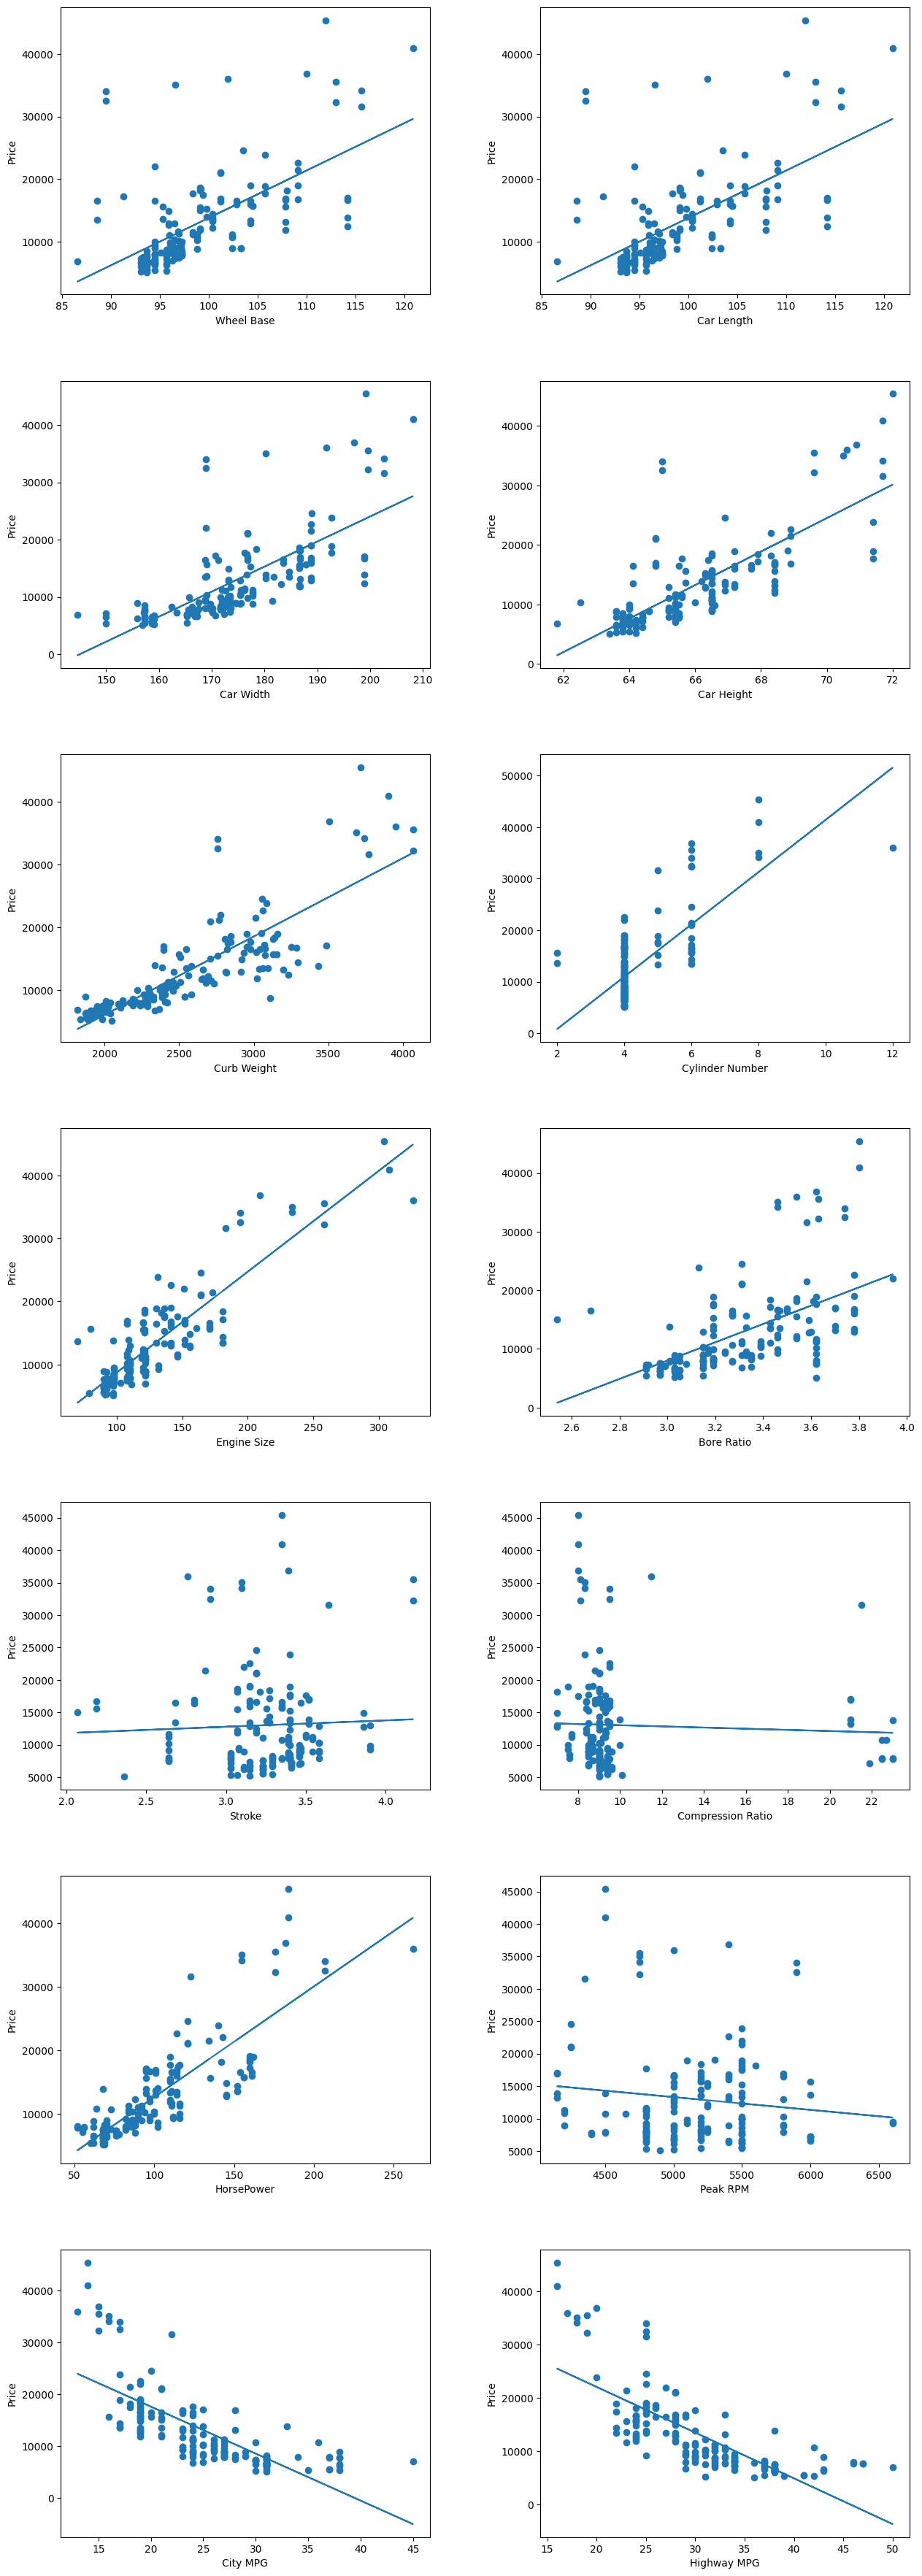


Wheelbase R2: 0.23489308188305869
Wheelbase Adj R2: 0.2152749557774961
      
Car Length R2: 0.23489308188305869
Car Length Adj R2: 0.2152749557774961
      
Car Width R2: 0.3710430285722235
Car Width Adj R2: 0.354915926740742
      
Car Height R2: 0.505406936503166
Car Height Adj R2: 0.4927250630801703
      
Curb Weight R2: 0.6771393265397734
Curb Weight Adj R2: 0.6688608477331008
      
Cylinder Number R2: 0.4798635722609511
Cylinder Number Adj R2: 0.46652674078046263
      
Engine Size R2: 0.7109273647303003
Engine Size Adj R2: 0.703515245877231

Bore Ratio R2: 0.32521501727207436  
Bore Ratio Adj R2: 0.3079128382277686        

Stroke R2: 0.013712670991568032
Stroke Adj R2: -0.011576747700955847

Compression Ratio R2: -0.03391815400018694  
Compression Ratio Adj R2: -0.06042887589762769  
    
Horse Power R2: 0.5599293979642217
Horse Power Adj R2: 0.5486455363735607
      
Peak RPM R2: -0.021244020045634082
Peak RPM Adj R2: -0.04742976414936817

City MPG R2: 0.3013938934017609
Ci

In [426]:
# IV vs DV
wbvsp = LinearRegression(x_wheelbase, y_price)
wbvsp.plot("Wheel Base", "Price")
clvsp = LinearRegression(x_wheelbase, y_price)
clvsp.plot("Car Length", "Price")
cwvsp = LinearRegression(x_carlength, y_price)
cwvsp.plot("Car Width", "Price")
chvsp = LinearRegression(x_carwidth, y_price)
chvsp.plot("Car Height", "Price")
cwevsp = LinearRegression(x_curbweight, y_price)
cwevsp.plot("Curb Weight", 'Price')
cnvsp = LinearRegression(x_cylindernumber, y_price)
cnvsp.plot("Cylinder Number", 'Price')
esvsp = LinearRegression(x_enginesize, y_price)
esvsp.plot("Engine Size", 'Price')
brvsp = LinearRegression(x_boreratio, y_price)
brvsp.plot("Bore Ratio", "Price")
svsp = LinearRegression(x_stroke, y_price)
svsp.plot("Stroke", 'Price')
crvsp = LinearRegression(x_compressionratio, y_price)
crvsp.plot("Compression Ratio", 'Price')
hpvsp = LinearRegression(x_horsepower, y_price)
hpvsp.plot("HorsePower", 'Price')
prvsp = LinearRegression(x_peakrpm, y_price)
prvsp.plot("Peak RPM", "Price")
cmvsp = LinearRegression(x_citympg, y_price)
cmvsp.plot("City MPG", 'Price')
hmvsp = LinearRegression(x_highwaympg, y_price)
hmvsp.plot("Highway MPG", 'Price')

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize=(15, 45))

fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.scatter(wbvsp.x_train, wbvsp.y_train)
ax1.plot(wbvsp.x_train, wbvsp.y_pred_train)
ax1.set_xlabel(wbvsp.nameX)
ax1.set_ylabel(wbvsp.nameY)

ax2.scatter(clvsp.x_train, clvsp.y_train)
ax2.plot(clvsp.x_train, clvsp.y_pred_train)
ax2.set_xlabel(clvsp.nameX)
ax2.set_ylabel(clvsp.nameY)


ax3.scatter(cwvsp.x_train, cwvsp.y_train)
ax3.plot(cwvsp.x_train, cwvsp.y_pred_train)
ax3.set_xlabel(cwvsp.nameX)
ax3.set_ylabel(cwvsp.nameY)

ax4.scatter(chvsp.x_train, chvsp.y_train)
ax4.plot(chvsp.x_train, chvsp.y_pred_train)
ax4.set_xlabel(chvsp.nameX)
ax4.set_ylabel(chvsp.nameY)

ax5.scatter(cwevsp.x_train, cwevsp.y_train)
ax5.plot(cwevsp.x_train, cwevsp.y_pred_train)
ax5.set_xlabel(cwevsp.nameX)
ax5.set_ylabel(cwevsp.nameY)

ax6.scatter(cnvsp.x_train, cnvsp.y_train)
ax6.plot(cnvsp.x_train, cnvsp.y_pred_train)
ax6.set_xlabel(cnvsp.nameX)
ax6.set_ylabel(cnvsp.nameY)

ax7.scatter(esvsp.x_train, esvsp.y_train)
ax7.plot(esvsp.x_train, esvsp.y_pred_train)
ax7.set_xlabel(esvsp.nameX)
ax7.set_ylabel(esvsp.nameY)

ax8.scatter(brvsp.x_train, brvsp.y_train)
ax8.plot(brvsp.x_train, brvsp.y_pred_train)
ax8.set_xlabel(brvsp.nameX)
ax8.set_ylabel(brvsp.nameY)

ax9.scatter(svsp.x_train, svsp.y_train)
ax9.plot(svsp.x_train, svsp.y_pred_train)
ax9.set_xlabel(svsp.nameX)
ax9.set_ylabel(svsp.nameY)

ax10.scatter(crvsp.x_train, crvsp.y_train)
ax10.plot(crvsp.x_train, crvsp.y_pred_train)
ax10.set_xlabel(crvsp.nameX)
ax10.set_ylabel(crvsp.nameY)

ax11.scatter(hpvsp.x_train, hpvsp.y_train)
ax11.plot(hpvsp.x_train, hpvsp.y_pred_train)
ax11.set_xlabel(hpvsp.nameX)
ax11.set_ylabel(hpvsp.nameY)

ax12.scatter(prvsp.x_train, prvsp.y_train)
ax12.plot(prvsp.x_train, prvsp.y_pred_train)
ax12.set_xlabel(prvsp.nameX)
ax12.set_ylabel(prvsp.nameY)

ax13.scatter(cmvsp.x_train, cmvsp.y_train)
ax13.plot(cmvsp.x_train, cmvsp.y_pred_train)
ax13.set_xlabel(cmvsp.nameX)
ax13.set_ylabel(cmvsp.nameY)

ax14.scatter(hmvsp.x_train, hmvsp.y_train)
ax14.plot(hmvsp.x_train, hmvsp.y_pred_train)
ax14.set_xlabel(hmvsp.nameX)
ax14.set_ylabel(hmvsp.nameY)

plt.show()

print(f"""
Wheelbase R2: {wbvsp.r2score}
Wheelbase Adj R2: {wbvsp.adj_r2score}

Car Length R2: {clvsp.r2score}
Car Length Adj R2: {clvsp.adj_r2score}

Car Width R2: {cwvsp.r2score}
Car Width Adj R2: {cwvsp.adj_r2score}

Car Height R2: {chvsp.r2score}
Car Height Adj R2: {chvsp.adj_r2score}

Curb Weight R2: {cwevsp.r2score}
Curb Weight Adj R2: {cwevsp.adj_r2score}

Cylinder Number R2: {cnvsp.r2score}
Cylinder Number Adj R2: {cnvsp.adj_r2score}

Engine Size R2: {esvsp.r2score}
Engine Size Adj R2: {esvsp.adj_r2score}

Bore Ratio R2: {brvsp.r2score}
Bore Ratio Adj R2: {brvsp.adj_r2score}

Stroke R2: {svsp.r2score}
Stroke Adj R2: {svsp.adj_r2score}

Compression Ratio R2: {crvsp.r2score}
Compression Ratio Adj R2: {crvsp.adj_r2score}

Horse Power R2: {hpvsp.r2score}
Horse Power Adj R2: {hpvsp.adj_r2score}

Peak RPM R2: {prvsp.r2score}
Peak RPM Adj R2: {prvsp.adj_r2score}

City MPG R2: {cmvsp.r2score}
City MPG Adj R2: {cmvsp.adj_r2score}

Highway MPG R2: {hmvsp.r2score}
Highway MPG Adj R2: {hmvsp.adj_r2score}
""")

Terdapat dua Variable bebas yang memiliki relasi yang rendah yaitu

1. Wheel Base
2. Car Length
3. Car Width
4. Cylinder Number
5. Bore Ratio
6. Stroke
7. Compression Ratio
8. Peak RPM
9. City MPG
10. Highway MPG

Dan Variable bebas ini tidak akan digunakan dan terdapat 4 variable bebas yang dapat digunakan yaitu

1. Car Height
2. Curb Weight
3. Engine Size
4. Horse Power

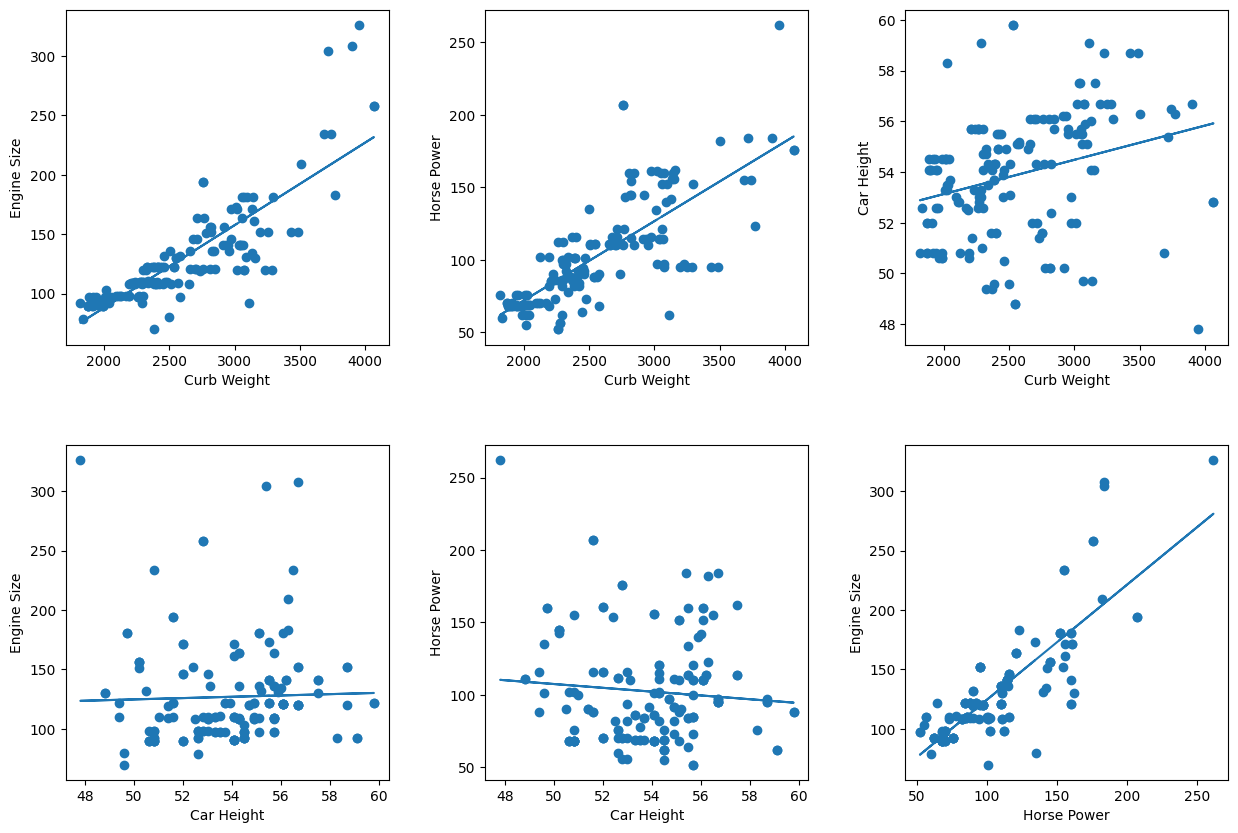


Curb Weight & Engine Size R2: 0.7473873866450678
Curb Weight & Engine Size Adj R2: 0.7409101401487874
      
Curb Weight & Horse Power R2: 0.49202949492207626
Curb Weight & Horse Power Adj R2: 0.47900461017648843
      
Curb Weight & Car Height R2: 0.08179157475887422
Curb Weight & Car Height Adj R2: 0.058247768983460735
      
Car Height & Engine Size R2: 0.009415074541894497
Car Height & Engine Size Adj R2: -0.01598453893139018
      
Car Height & Horse Power R2: 0.021909136119225625
Car Height & Horse Power Adj R2: -0.003170116800794265
      
Horse Power & Engine Size R2: 0.42968907833483416
Horse Power & Engine Size Adj R2: 0.4150657213690607



In [431]:
# IV vs IV
# Jika Ada yang memiliki relasi gunakan salah satu dari IV Variable
cwevses = LinearRegression(x_curbweight, x_enginesize)
cwevses.plot("Curb Weight", 'Engine Size')
cwevshp = LinearRegression(x_curbweight, x_horsepower)
cwevshp.plot("Curb Weight", 'Horse Power')
cwevsch = LinearRegression(x_curbweight, x_carheight)
cwevsch.plot("Curb Weight", 'Car Height')
chvses = LinearRegression(x_carheight, x_enginesize)
chvses.plot("Car Height", 'Engine Size')
chvshp = LinearRegression(x_carheight, x_horsepower)
chvshp.plot("Car Height", 'Horse Power')
hpvses = LinearRegression(x_horsepower, x_enginesize)
hpvses.plot("Horse Power", 'Engine Size')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.scatter(cwevses.x_train, cwevses.y_train)
ax1.plot(cwevses.x_train, cwevses.y_pred_train)
ax1.set_xlabel(cwevses.nameX)
ax1.set_ylabel(cwevses.nameY)

ax2.scatter(cwevshp.x_train, cwevshp.y_train)
ax2.plot(cwevshp.x_train, cwevshp.y_pred_train)
ax2.set_xlabel(cwevshp.nameX)
ax2.set_ylabel(cwevshp.nameY)


ax3.scatter(cwevsch.x_train, cwevsch.y_train)
ax3.plot(cwevsch.x_train, cwevsch.y_pred_train)
ax3.set_xlabel(cwevsch.nameX)
ax3.set_ylabel(cwevsch.nameY)

ax4.scatter(chvses.x_train, chvses.y_train)
ax4.plot(chvses.x_train, chvses.y_pred_train)
ax4.set_xlabel(chvses.nameX)
ax4.set_ylabel(chvses.nameY)

ax5.scatter(chvshp.x_train, chvshp.y_train)
ax5.plot(chvshp.x_train, chvshp.y_pred_train)
ax5.set_xlabel(chvshp.nameX)
ax5.set_ylabel(chvshp.nameY)

ax6.scatter(hpvses.x_train, hpvses.y_train)
ax6.plot(hpvses.x_train, hpvses.y_pred_train)
ax6.set_xlabel(hpvses.nameX)
ax6.set_ylabel(hpvses.nameY)

plt.show()

print(f"""
Curb Weight & Engine Size R2: {cwevses.r2score}
Curb Weight & Engine Size Adj R2: {cwevses.adj_r2score}

Curb Weight & Horse Power R2: {cwevshp.r2score}
Curb Weight & Horse Power Adj R2: {cwevshp.adj_r2score}

Curb Weight & Car Height R2: {cwevsch.r2score}
Curb Weight & Car Height Adj R2: {cwevsch.adj_r2score}

Car Height & Engine Size R2: {chvses.r2score}
Car Height & Engine Size Adj R2: {chvses.adj_r2score}

Car Height & Horse Power R2: {chvshp.r2score}
Car Height & Horse Power Adj R2: {chvshp.adj_r2score}

Horse Power & Engine Size R2: {hpvses.r2score}
Horse Power & Engine Size Adj R2: {hpvses.adj_r2score}
""")

Dari Hasil R-Squared dan Adjusted R-Squared di atas dapat ditemukan bahwa
terdapat tiga variable yang dapat dipakai dalam Multi Linear Regression Yaitu

1. Curb Weight
2. Horse Power
3. Engine SIze

In [434]:
X = df.loc[:, ['curbweight', 'horsepower', 'enginesize']]
y = df.loc[:, 'price']

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [447]:
x_cwe_train = np.array(X_train.loc[:, 'curbweight'])
x_hp_train = np.array(X_train.loc[:, 'horsepower'])
x_es_train = np.array(X_train.loc[:, 'enginesize'])

x_cwe_test = np.array(X_test.loc[:, 'curbweight'])
x_hp_test = np.array(X_test.loc[:, 'horsepower'])
x_es_test = np.array(X_test.loc[:, 'enginesize'])

y_train = np.array(y_train)
y_test = np.array(y_test)

meany = np.mean(y_train)

mean_cwe = np.mean(x_cwe_train)
mean_hp = np.mean(x_hp_train)
mean_es = np.mean(x_es_train)

b1_cwe = sum((y_train - meany) * (x_cwe_train - mean_cwe)) / sum((x_cwe_train - mean_cwe) ** 2)
b1_hp = sum((y_train - meany) * (x_hp_train - mean_hp)) / sum((x_hp_train - mean_hp) ** 2)
b1_es = sum((y_train - meany) * (x_es_train - mean_es)) / sum((x_es_train - mean_es) ** 2)

b0 = meany - (b1_cwe * mean_cwe) - (b1_hp * mean_hp) - (b1_es * mean_es)

y_pred_train = b0 + (b1_cwe * x_cwe_train) + (b1_hp * x_hp_train) + (b1_es * x_es_train)
y_pred_test = b0 + (b1_cwe * x_cwe_test) + (b1_hp * x_hp_test) + (b1_es * x_es_test)

In [460]:
# R2 Score and Adjusted R2
r2score = 1 - sum((y_test - y_pred_test) ** 2) / sum((y_test - meany) ** 2)
adj_r2score = 1 - (((1 - r2score) * (len(y_test) - 1)) / (len(y_test) - 3 - 1))
# MSE
MSE = sum((y_test - y_pred_test) ** 2) / len(y_test)
MAPE = (sum((y_test - y_pred_test) / y_test) / len(y_test)) * 100

print(f"""
R-squared: {r2score}
Adjusted R-Squared: {adj_r2score}
MSE: {MSE}
MAPE: {MAPE}%
""")


R-squared: -0.9623489474504567
Adjusted R-Squared: -1.1214583215680611
MSE: 168565810.13199314
MAPE: 40.35988464498997%

